In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [3]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train["Functional"].mode()

0    Typ
dtype: object

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


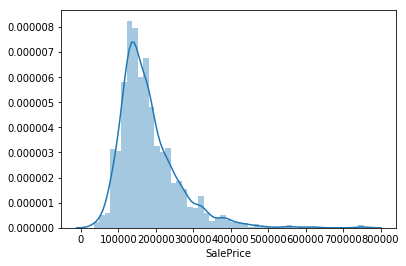

In [4]:
#histogram
sns.distplot(df_train['SalePrice']);

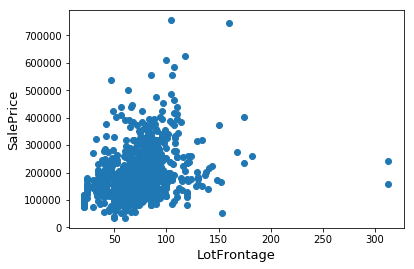

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['LotFrontage'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

In [12]:
df_train[(df_train['LotFrontage']>300) & (df_train['SalePrice']<300000)].index

Int64Index([934, 1298], dtype='int64')

In [15]:
(df_train[df_train['LotFrontage']>300])['LotFrontage']

934     313.0
1298    313.0
Name: LotFrontage, dtype: float64

In [14]:
df_train["SalePrice"].corr(df_train["LotFrontage"])

0.3517990965706781

In [13]:
df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index


Int64Index([523, 1298], dtype='int64')

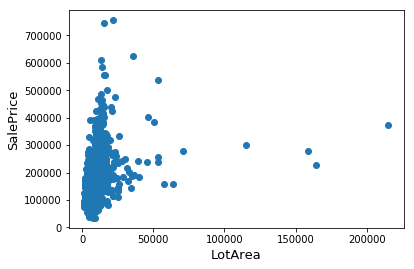

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['LotArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

In [16]:
df_train["SalePrice"].corr(df_train["LotArea"])

0.26384335387140573

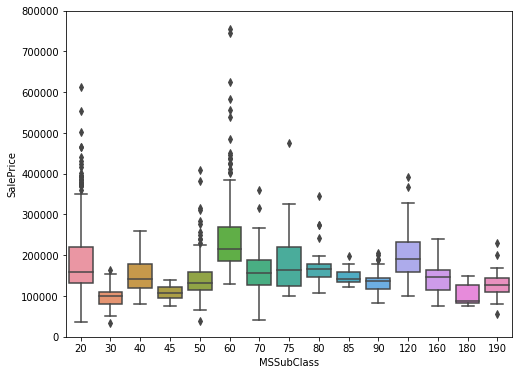

In [8]:
var = 'MSSubClass'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

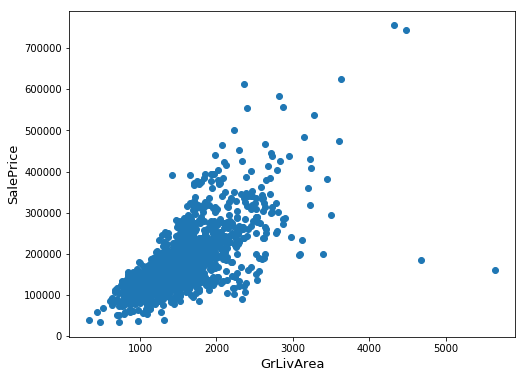

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

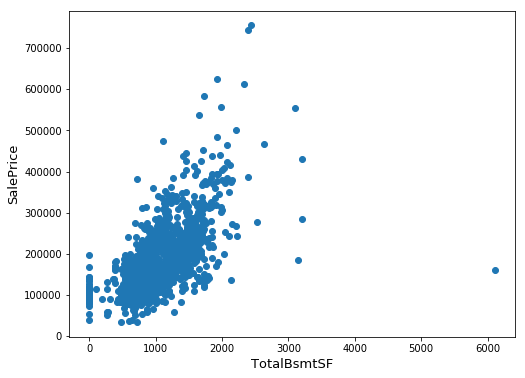

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

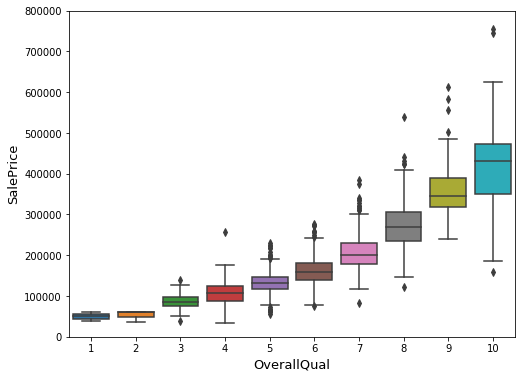

In [7]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xlabel('OverallQual',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
fig.axis(ymin=0, ymax=800000);

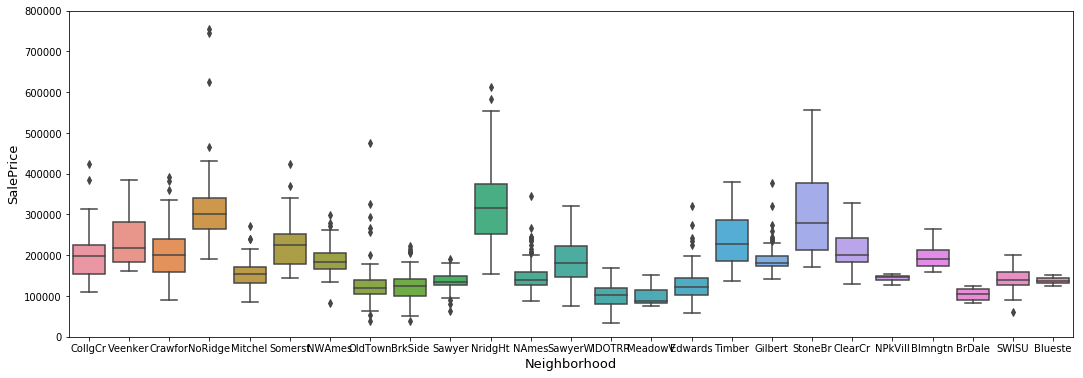

In [10]:
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xlabel('Neighborhood',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
fig.axis(ymin=0, ymax=800000);

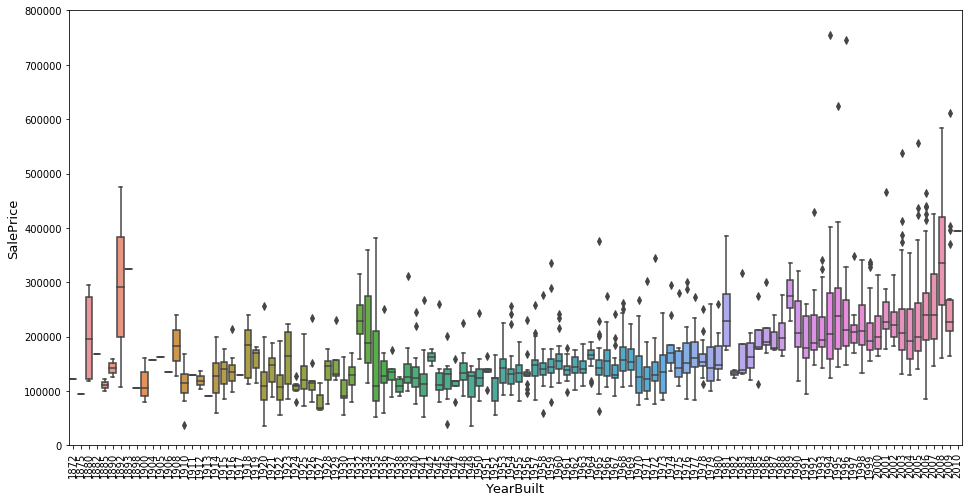

In [12]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xlabel('YearBuilt',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.xticks(rotation=90);

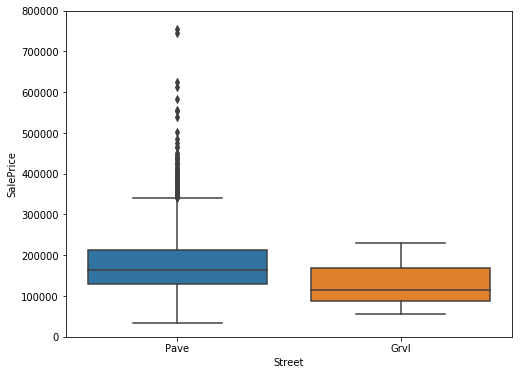

In [18]:
var = 'Street'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

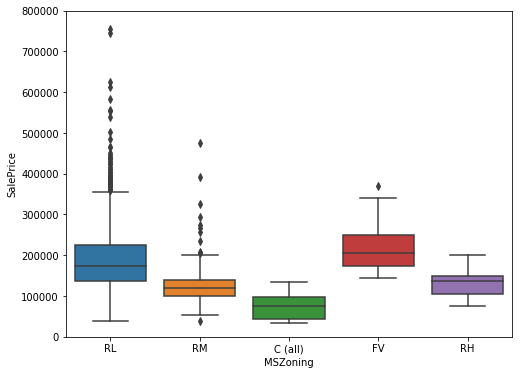

In [10]:
var = 'MSZoning'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 180932.92 and sigma = 79467.79



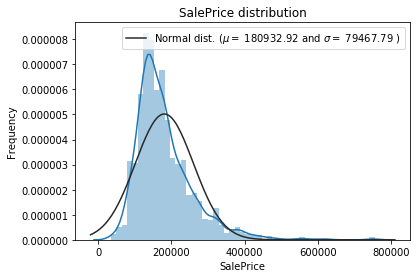

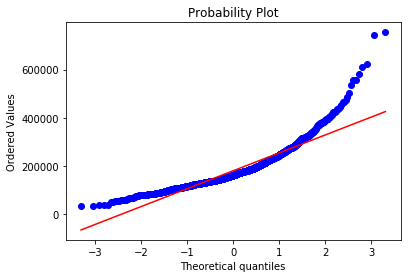

In [36]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [37]:


#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())



Skewness: 1.881296
Kurtosis: 6.523067


In [20]:
df_train["TotalBsmtSF"].skew()
df_train["TotalBsmtSF"].kurt()


1.7504545416868234

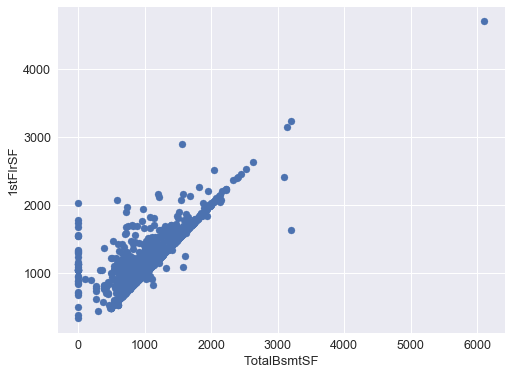

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['1stFlrSF'])
plt.ylabel('1stFlrSF', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

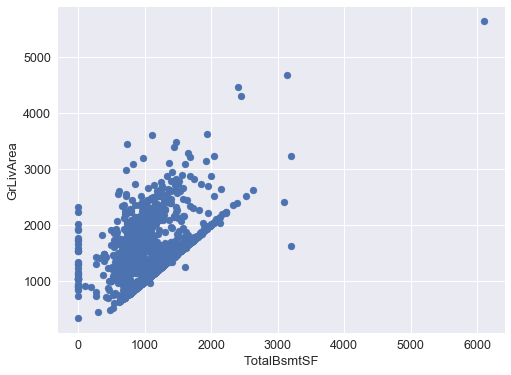

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['GrLivArea'])
plt.ylabel('GrLivArea', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

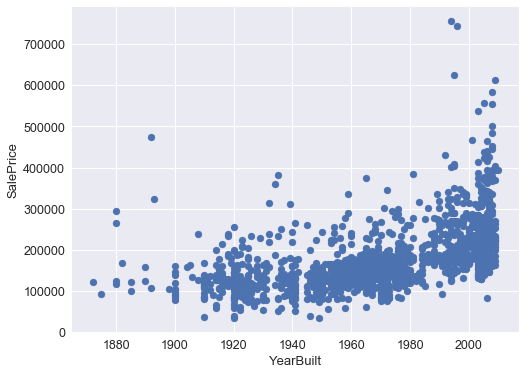

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y = df_train['SalePrice'], x = df_train['YearBuilt'])
plt.xlabel('YearBuilt', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

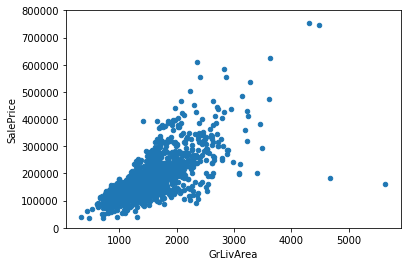

In [7]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


 mu = 12.02 and sigma = 0.40



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


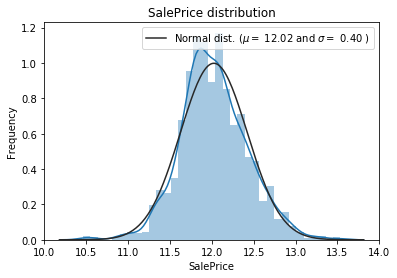

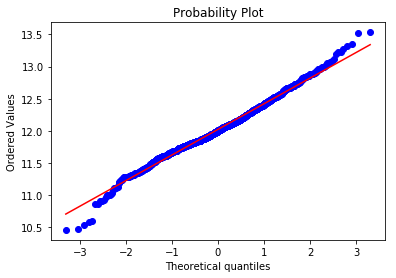

In [68]:
#We use the numpy fuction log which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


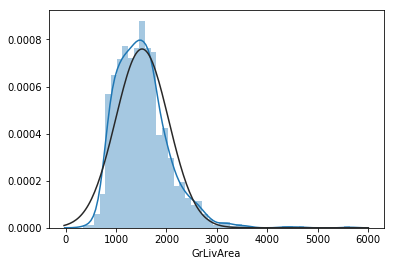

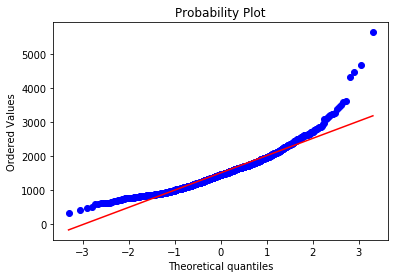

In [6]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


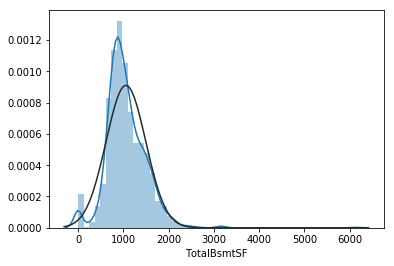

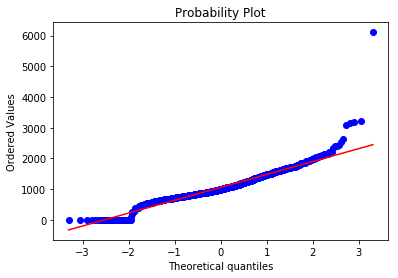

In [7]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

GET LAMBDA FOR EACH FEATURE FOR BOXCOX


In [8]:
#OUTLIER TING
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)


In [39]:
df_train.shape[0]

1458

In [9]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

#Save the 'Id' column
df_train_ID = df_train['Id']
df_test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))

The train data size before dropping Id feature is : (1458, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1458, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [15]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [11]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(25)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Feature Engineering


Text(0.5,1,'Percent missing data by feature')

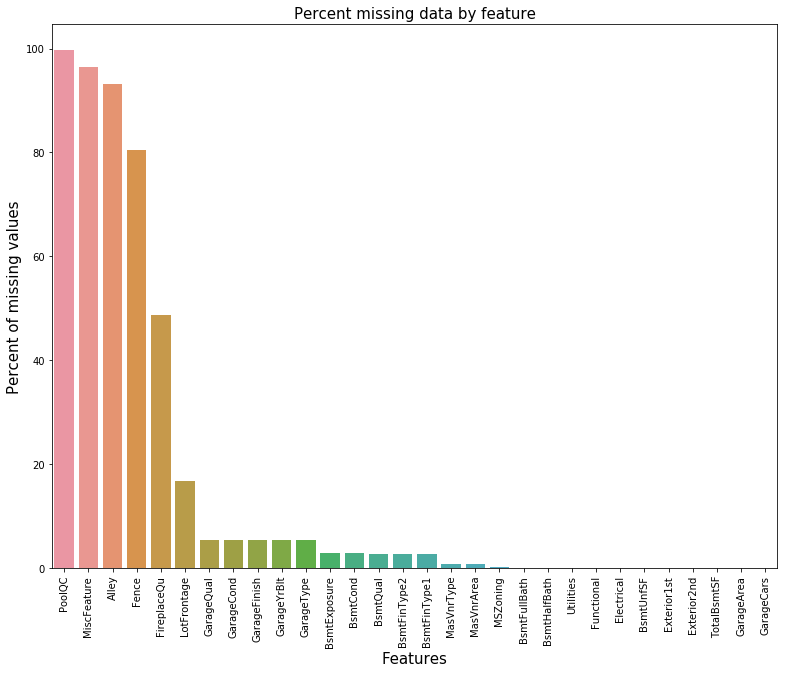

In [12]:
f, ax = plt.subplots(figsize=(13, 10))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [16]:
all_data["PoolQC"]=all_data["PoolQC"].fillna("None")
all_data["MiscFeature"]=all_data["MiscFeature"].fillna("None")
all_data["Alley"]=all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning']\
                                                   .mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical']\
.fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual']\
.fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st']\
.fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd']\
.fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType']\
.fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data['TotalSF'] = all_data['TotalBsmtSF'] \
+ all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [17]:
cleanup_nums={"KitchenQual":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
      "FireplaceQu":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
      "GarageQual":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
      "GarageCond":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
      "PoolQC":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
     "ExterQual":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
      "ExterCond":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
      "BsmtCond":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
      "BsmtQual":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
      "HeatingQC":{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
      "GarageFinish":{"Fin":3,"RFn":2,"Unf":1,"None":0},
       "Functional":{"Typ":7,"Min1":6,"Min2":5,"Mod":4,"Maj1":3,"Maj2":2,"Sev":1,"Sal":0},
         "CentralAir":{"Y":1,"N":0}, 
       "PavedDrive":{"Y":2,"P":1,"N":0},
             "Street":{"Paved":1,"Gravel":0}}

    

In [18]:
all_data.replace(cleanup_nums,inplace=True)

In [19]:
all_data.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond           int64
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual           int64
BsmtUnfSF        float64
CentralAir         int64
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond          int64
ExterQual          int64
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu        int64
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64


In [23]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

ModuleNotFoundError: No module named 'xgboost'

Numerical Variables

In [7]:
list(set(df_train.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [8]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018D96240>,
      dtype=object)

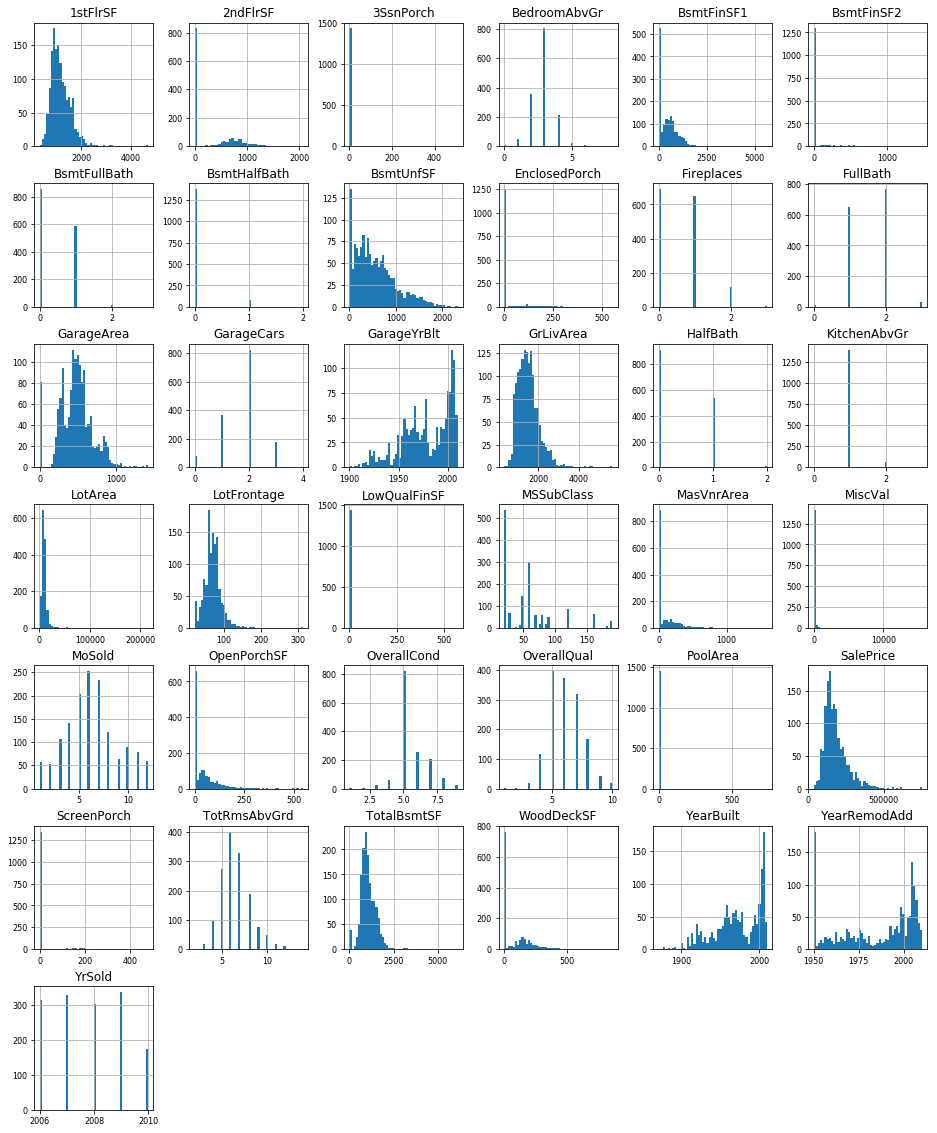

In [22]:
df_num.hist(figsize=(16, 20),bins=50,xlabelsize=8,ylabelsize=8)

In [9]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
highcorr = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
#print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))
highcorr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [29]:
df_train["SalePrice"].corr(df_train["2ndFlrSF"])

0.3193338028320677

In [35]:
x=df_train["2ndFlrSF"]


In [27]:
all_correlations


[('KitchenAbvGr', -0.13920069217785566),
 ('HalfBath', -0.08439171127179887),
 ('MSSubClass', -0.08428413512659523),
 ('OverallCond', -0.0778558940486776),
 ('YrSold', -0.028922585168730426),
 ('BsmtHalfBath', -0.028834567185481712),
 ('PoolArea', -0.014091521506356928),
 ('BsmtFullBath', 0.011439163340408634),
 ('MoSold', 0.04643224522381936),
 ('3SsnPorch', 0.06393243256889079),
 ('OpenPorchSF', 0.08645298857147708),
 ('MiscVal', 0.08896338917298924),
 ('Fireplaces', 0.1216605842136395),
 ('BsmtUnfSF', 0.16926100049514192),
 ('BedroomAbvGr', 0.18093669310849045),
 ('WoodDeckSF', 0.19370601237520677),
 ('BsmtFinSF2', 0.19895609430836586),
 ('EnclosedPorch', 0.2412788363011751),
 ('ScreenPorch', 0.25543007954878405),
 ('LotArea', 0.2638433538714063),
 ('LowQualFinSF', 0.3000750165550133),
 ('LotFrontage', 0.35179909657067854),
 ('MasVnrArea', 0.4340902197568926),
 ('BsmtFinSF1', 0.4716904265235731),
 ('GarageYrBlt', 0.48636167748786213),
 ('YearRemodAdd', 0.5071009671113867),
 ('YearBu

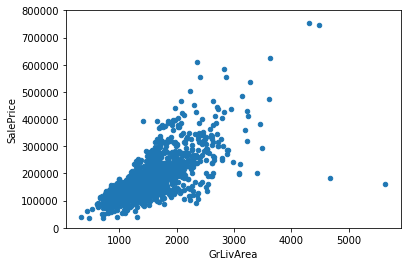

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

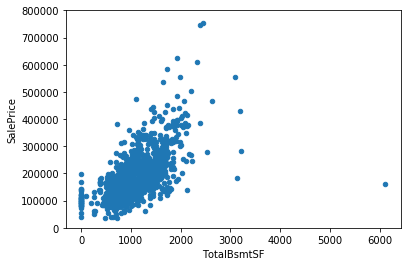

In [14]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

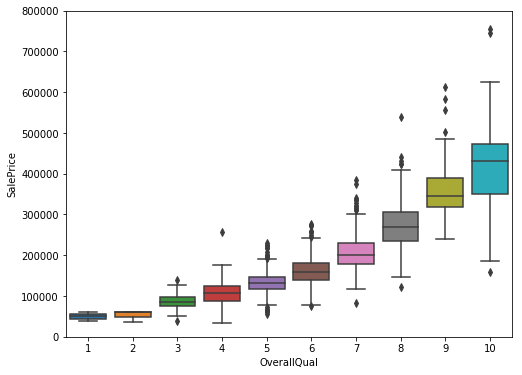

In [15]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [16]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in

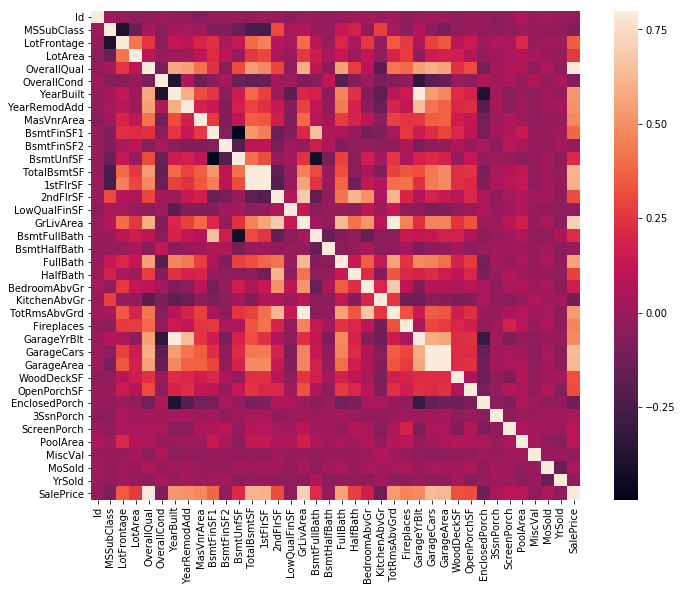

In [11]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

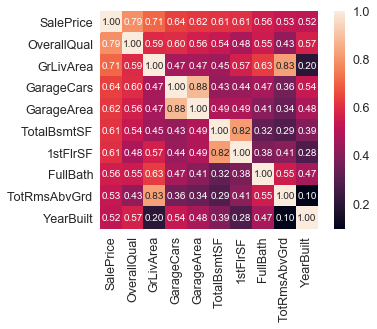

In [15]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',\
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [21]:
df_train[cols].values.T

array([[208500, 181500, 223500, ..., 266500, 142125, 147500],
       [     7,      6,      7, ...,      7,      5,      5],
       [  1710,   1262,   1786, ...,   2340,   1078,   1256],
       ...,
       [     2,      2,      2, ...,      2,      1,      1],
       [     8,      6,      6, ...,      9,      5,      6],
       [  2003,   1976,   2001, ...,   1941,   1950,   1965]], dtype=int64)

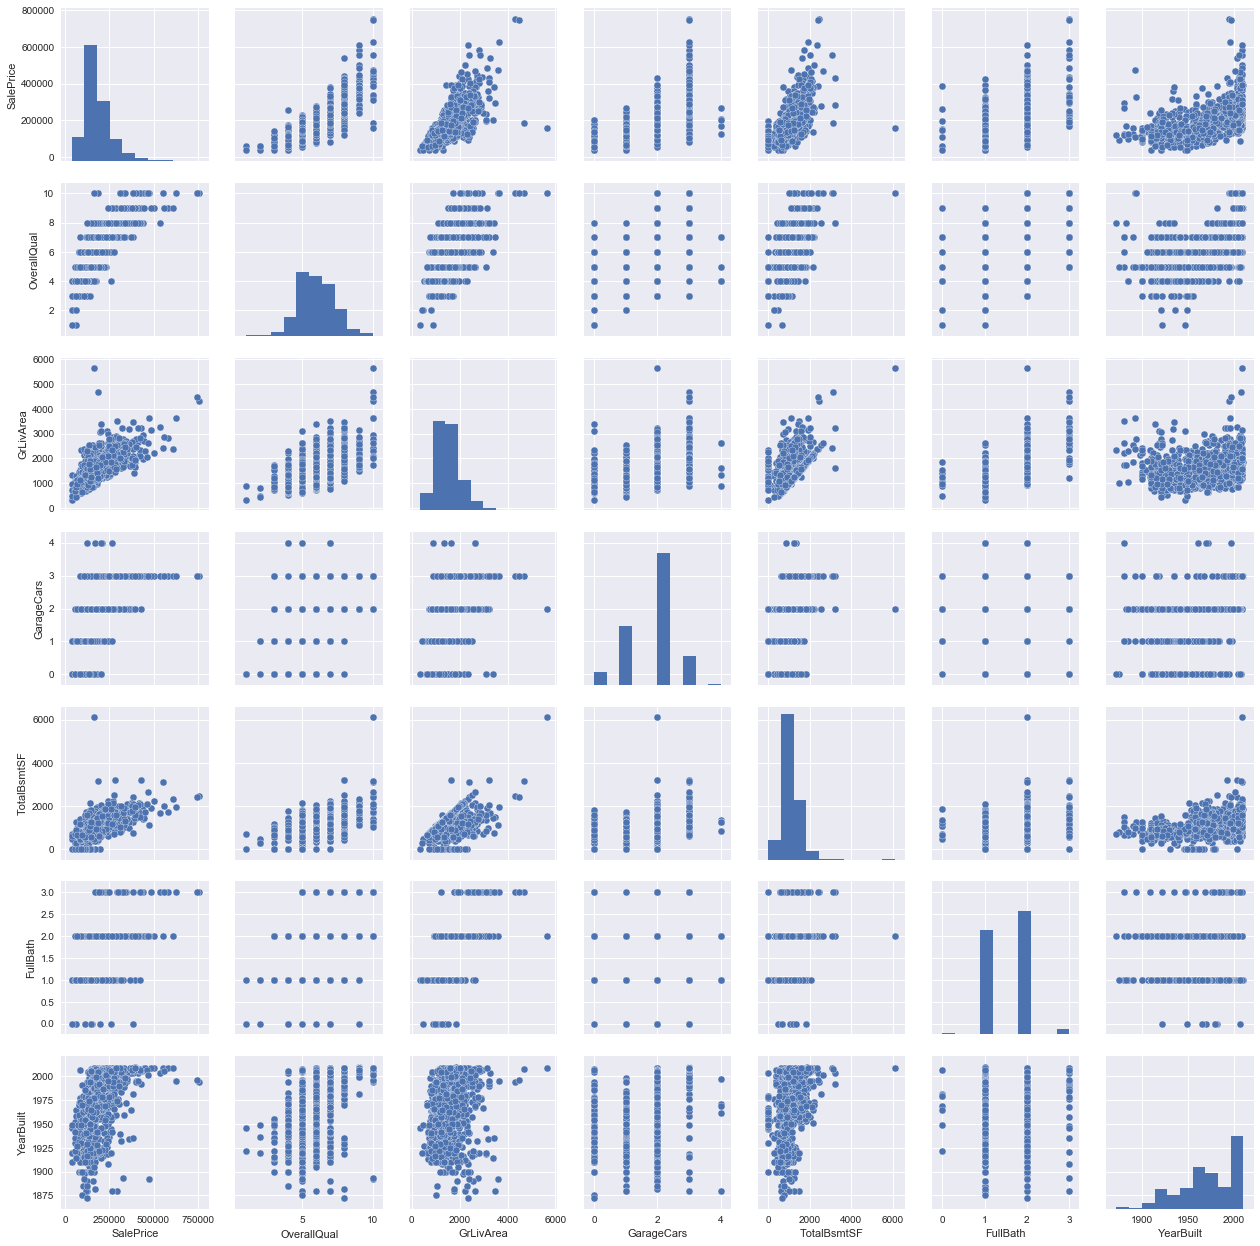

In [22]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [35]:


#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)



outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:


#deleting points
#OUTLIER TING
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)




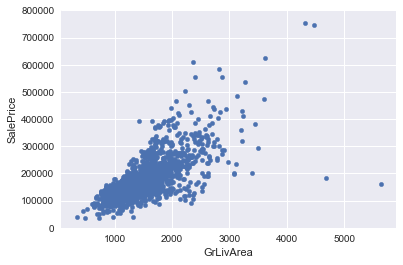

In [36]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [57]:
df_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,1,0,0,0,0,1,0
5,50,85.0,14115,5,5,1993,1995,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,186.0,4,3,...,0,0,0,1,0,0,0,0,1,0
7,60,80.0,10382,7,6,1973,1973,240.0,3,3,...,0,0,0,1,0,0,0,0,1,0
8,50,51.0,6120,7,5,1931,1950,0.0,3,3,...,0,0,0,1,1,0,0,0,0,0
9,190,50.0,7420,5,6,1939,1950,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
xt, maxlog, interval = stats.boxcox(x, alpha=0.05)
print("lambda = {:g}".format(maxlog))

In [20]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object" ].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolQC,19.548879
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [22]:
skewness = skewness[abs(skewness.Skew) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
for feat in skewed_features:
    #all_data[feat] += 1
    posdata=(all_data[all_data[feat]>0])[feat]
    print(feat)
    xt, maxlog, interval = stats.boxcox(posdata, alpha=0.05)
    all_data[feat] = boxcox1p(all_data[feat], maxlog)
  
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 40 skewed numerical features to Box Cox transform
MiscVal
PoolQC
PoolArea
LotArea
LowQualFinSF
3SsnPorch
KitchenAbvGr
BsmtFinSF2
EnclosedPorch
ScreenPorch
BsmtHalfBath
MasVnrArea
OpenPorchSF
WoodDeckSF
MSSubClass
ExterCond
1stFlrSF
LotFrontage
GrLivArea
TotalSF
BsmtFinSF1
BsmtUnfSF
2ndFlrSF
ExterQual
TotRmsAbvGrd
Fireplaces
HalfBath
TotalBsmtSF
BsmtFullBath
OverallCond
HeatingQC
YearBuilt
BsmtQual
PavedDrive
GarageQual
GarageCond
CentralAir
BsmtCond
GarageYrBlt
Functional


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:911: RuntimeWarning: invalid value encountered in double_scalars
  return boxcox_llf(lmbda, data) - target


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


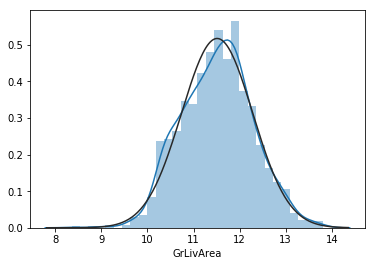

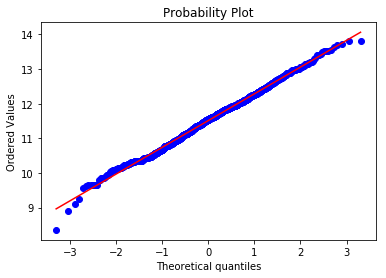

In [15]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


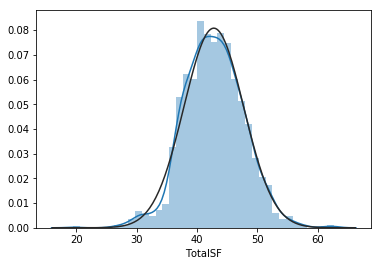

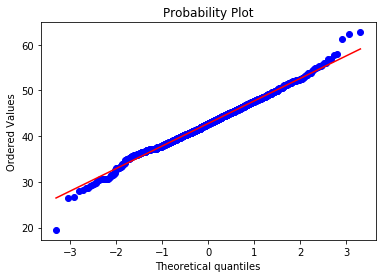

In [55]:
sns.distplot(df_train['TotalSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalSF'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


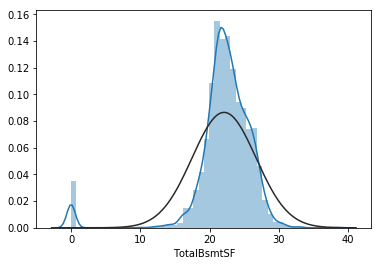

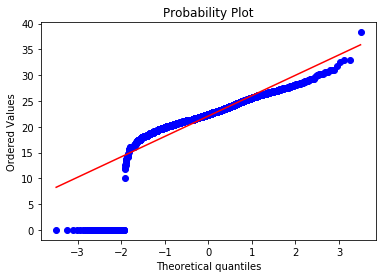

In [23]:
sns.distplot(all_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['TotalBsmtSF'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


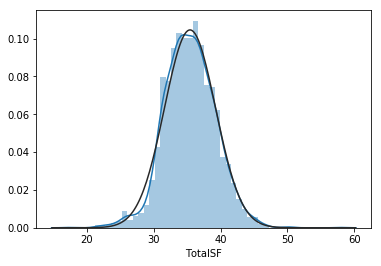

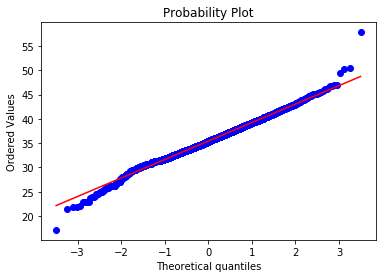

In [26]:
sns.distplot(all_data['TotalSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['TotalSF'], plot=plt)

In [27]:
all_data["TotalSF"].skew()

0.03110237881334192

In [25]:
all_data["TotalBsmtSF"].skew()

-2.8192345942078014

In [28]:
all_data=pd.get_dummies(all_data)

After taking logarithm of the same data the curve seems to be normally distributed, although not perfectly normal, this is sufficient to fix the issues from a skewed dataset as we saw before.

Important : If you log transform the response variable, it is required to also log transform feature variables that are skewed.

https://www.kaggle.com/vjgupta/reach-top-10-with-simple-model-on-housing-prices

In [34]:
#creating matrices for sklearn:
X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]
y = df_train.SalePrice

In [40]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return rmse

In [41]:
model_ridge=Ridge()

In [42]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.084800e-147
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.125323e-147
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.015844e-147
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.010163e-147
  overwrite_a=True).T
C:\P

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.682274e-144
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.793030e-144
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.600657e-144
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.835331e-144
  overwrite_a=True).T
C:\P

Text(0,0.5,'rmse')

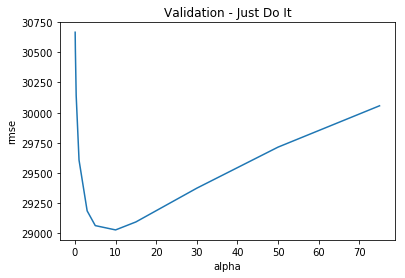

In [38]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [39]:
cv_ridge.min()

29029.171353729085

In [ ]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [48]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [45]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import xgboost as xgb
#import lightgbm as lgb

In [55]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [46]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [47]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [49]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [50]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [51]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [56]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa


Lasso score: 30844.2968 (2918.7330)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [57]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtQual,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,6.111907,48.015303,0.000000,3,4.348258,67.016908,0.000000,0.023011,0.000000,2.436246,...,0,0,0,0,0,0,0,1,0,1
1,6.426608,0.000000,0.000000,3,4.348258,80.650148,0.000000,0.000000,0.015843,2.436246,...,0,0,0,0,0,0,0,1,0,1
2,6.170630,48.342965,0.000000,3,4.348258,54.150026,0.000000,0.023011,0.000000,2.436246,...,0,0,0,0,0,0,0,1,0,1
3,6.206080,45.242226,0.000000,3,6.235392,33.915498,0.000000,0.023011,0.000000,1.975356,...,0,0,0,0,0,0,0,1,0,1
4,6.348066,53.166239,0.000000,4,4.348258,64.214579,0.000000,0.023011,0.000000,2.436246,...,0,0,0,0,0,0,0,1,0,1
5,6.052598,39.257567,33.234223,1,4.348258,68.410893,0.000000,0.023011,0.000000,2.436246,...,0,0,0,0,0,0,0,1,0,1
6,6.662906,0.000000,0.000000,3,4.348258,97.563699,0.000000,0.023011,0.000000,2.851570,...,0,0,0,0,0,0,0,1,0,1
7,6.320767,51.418705,0.000000,3,4.348258,74.925180,6.797697,0.023011,0.000000,2.436246,...,0,0,0,0,0,0,0,1,0,1
8,6.256042,45.125087,0.000000,2,4.348258,0.000000,0.000000,0.000000,0.000000,1.975356,...,0,0,0,0,0,0,0,1,0,1
9,6.298526,0.000000,0.000000,2,4.348258,74.528040,0.000000,0.023011,0.000000,1.975356,...,0,0,0,0,0,0,0,1,0,1
